## *Import Libraries*

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [14]:
warnings.filterwarnings('ignore')

## *Load Data*

In [23]:
ford = pd.read_csv('/content/drive/MyDrive/Datasets/ford.csv')

## *Remove Outlires Year*

In [24]:
ford_clear = ford.query('year<=2024 and price<=48_000')

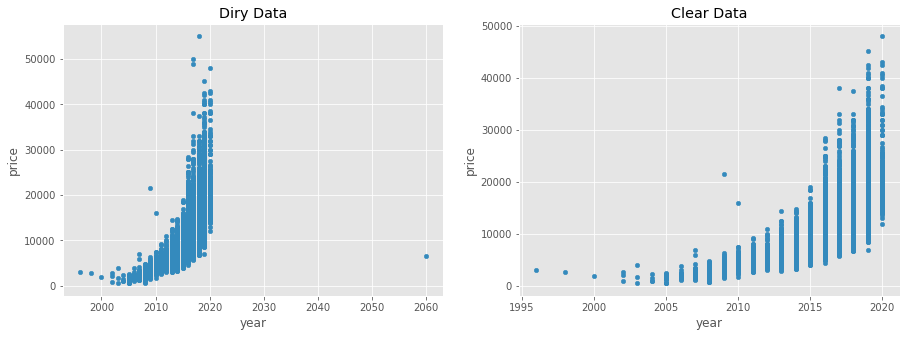

In [25]:
plt.style.use('ggplot')

fig,ax = plt.subplots(1,2,figsize = (15,5))
ford.plot(kind = "scatter",
        x = "year",
        y = "price",
        ax = ax[0],
        title = "Diry Data")

ford_clear.plot(kind = "scatter",
        x = "year",
        y = "price",
        ax = ax[1],
         title = "Clear Data")

plt.savefig('remove_otlires.png')
plt.show()

## *Correlation*

In [26]:
ford_clear.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.648834,-0.718673,0.300508,-0.021414,-0.139877
price,0.648834,1.000000,-0.532958,0.408638,-0.344669,0.406707
mileage,-0.718673,-0.532958,1.000000,-0.260588,0.120080,0.216438
tax,0.300508,0.408638,-0.260588,1.000000,-0.503081,0.184585
mpg,-0.021414,-0.344669,0.120080,-0.503081,1.000000,-0.258229
engineSize,-0.139877,0.406707,0.216438,0.184585,-0.258229,1.000000


##  *Preprocessing*

In [27]:
X = ford_clear.drop(columns = ['price'])
X_ohe = pd.get_dummies(X,prefix_sep="",prefix="").values
y = ford_clear.price.values

## *Split Data*

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_ohe,
                                            y,
                                            test_size=0.3,
                                              random_state=42)

## *First Model*

In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression(normalize=True).fit(X_train,y_train)

In [35]:
r2_train = lm.score(X_train,y_train)
r2_test = lm.score(X_test,y_test)

In [36]:
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

R2 Train: 0.8516875052954962
R2 Test: -5.950328314689193e+18


## *Variable Transformation*

In [37]:
ford_clear.mileage = ford_clear.mileage.apply(np.sqrt)
ford_clear.price = ford_clear.price.apply(np.log)

In [38]:
ford_clear.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.774283,-0.716660,0.300508,-0.021414,-0.139877
price,0.774283,1.000000,-0.625558,0.379958,-0.240431,0.286589
mileage,-0.716660,-0.625558,1.000000,-0.299759,0.164870,0.199208
tax,0.300508,0.379958,-0.299759,1.000000,-0.503081,0.184585
mpg,-0.021414,-0.240431,0.164870,-0.503081,1.000000,-0.258229
engineSize,-0.139877,0.286589,0.199208,0.184585,-0.258229,1.000000


Thanks to the transformations that we carry out a better correlation with the variable that we try to estimate is appreciated.

In [39]:
X = ford_clear.drop(columns = ['price'])
X_ohe = pd.get_dummies(X,prefix_sep="",prefix="").values
y = ford_clear.price.values

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_ohe,
                                  y,
                              test_size=0.3,
                                random_state=42)

In [41]:
lm = LinearRegression().fit(X_train,y_train)

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
r2_train = lm.score(X_train,y_train)
r2_test = lm.score(X_test,y_test)
cv = cross_val_score(lm,X_test,y_test,cv = 5).mean()

In [45]:
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')
print(f'CV: {cv}')

R2 Train: 0.8962549367253717
R2 Test: 0.896894302194804
CV: 0.8957991829128724


The model can explain most of the data, so it is able to generalize successfully and can be used to solve the problem.

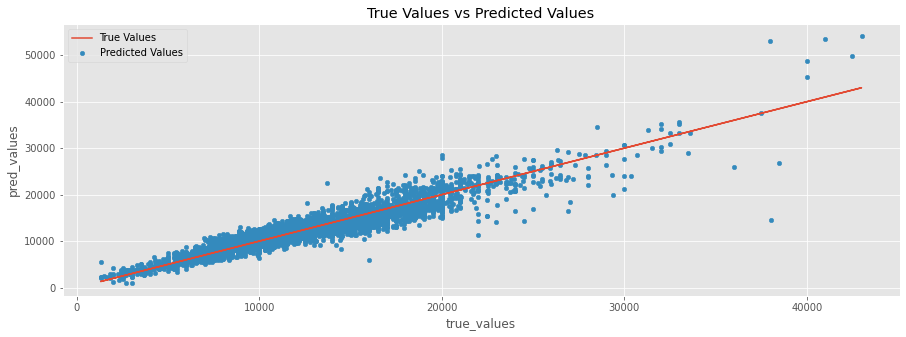

In [46]:
test = pd.DataFrame()
test['true_values'] = np.exp(y_test)
test['pred_values'] = np.exp(lm.predict(X_test))

test.plot(kind = "scatter",
          x = "true_values",
          y = "pred_values",
          figsize = (15,5),
          title = "True Values vs Predicted Values",
          label = "Predicted Values")

plt.plot(test.true_values,test.true_values,
         label = "True Values")

plt.legend()
plt.savefig('pred_values_true_values.png')
plt.show()